### Dataset from Kaggle
HR Analytics

#### LOGISTIC REGRESSION:
    Is a supervised machine learning model that can be used to model the probalility of a certain class or event.
    It is usually used for binary classification problem.
    
    Predict odds: p / 1 - p
    
    logistic regression equation: y hat = 1 / (1 + e -b0+b1x), i.e sigmoid function y hat = 1 / (1 + e -z)
    
    To evaluvate the model we calculate the loss
    
    cross entropy loss function or confusion matrix
    

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.feature_selection import RFE

In [3]:
df = pd.read_csv("Hr_comma_sep.csv")

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Data exploration and visualization

In [5]:
left = df[df.left==1]
left.shape

(3571, 10)

#### Average numbers for all columns


In [6]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


##### From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)

**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm


Impact of salary on employee retention

<AxesSubplot:xlabel='salary'>

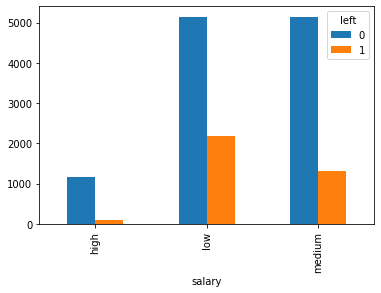

In [7]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

##### Above bar chart shows employees with high salaries are likely to not leave the company

Department wise employee retention rate

<AxesSubplot:xlabel='Department'>

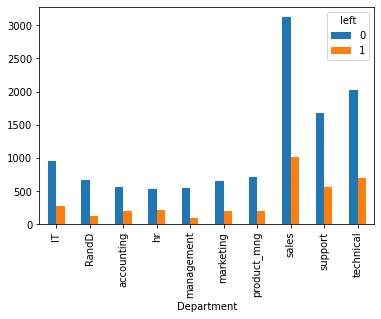

In [9]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

#### From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [12]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


c:\users\arshad ali\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


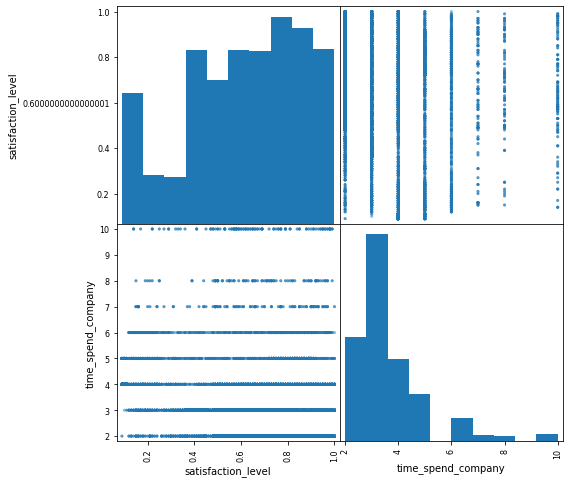

In [17]:
pd.plotting.scatter_matrix(df[['satisfaction_level','time_spend_company', 'salary']], figsize=(8, 8))
plt.show()

In [18]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


##### From the data analysis so far we can conclude that we will use following variables as independant variables in our model
**Satisfaction Level**
**Average Monthly Hours**
**Promotion Last 5 Years**
**Salary**

#####  From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

In [10]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


#### Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. 
Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [19]:

salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [22]:

df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [21]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


##### Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [23]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


#### We now consider our input variables x and output variable y into different datasets

In [24]:

X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   average_montly_hours   14999 non-null  int64  
 2   promotion_last_5years  14999 non-null  int64  
 3   salary_high            14999 non-null  uint8  
 4   salary_low             14999 non-null  uint8  
 5   salary_medium          14999 non-null  uint8  
dtypes: float64(1), int64(2), uint8(3)
memory usage: 395.5 KB


In [27]:
y = df.left

##### Now I split the data from train and for test in 70 : 30 ratio

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4499 entries, 9198 to 4135
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     4499 non-null   float64
 1   average_montly_hours   4499 non-null   int64  
 2   promotion_last_5years  4499 non-null   int64  
 3   salary_high            4499 non-null   uint8  
 4   salary_low             4499 non-null   uint8  
 5   salary_medium          4499 non-null   uint8  
dtypes: float64(1), int64(2), uint8(3)
memory usage: 153.8 KB


In [37]:
X_train.head(25)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
9198,0.91,169,0,0,1,0
9502,0.73,166,0,0,1,0
1113,0.10,306,0,0,0,1
3912,0.44,183,0,0,1,0
12151,0.45,154,0,0,1,0
11587,0.18,240,0,0,1,0
10841,0.71,271,0,0,1,0
12210,0.43,156,0,0,1,0
1894,0.11,268,0,0,0,1
10114,0.67,203,0,0,1,0


In [40]:
y_train.head()

9198     0
9502     0
1113     1
3912     0
12151    1
Name: left, dtype: int64

In [31]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [32]:

model.fit(X_train, y_train)

LogisticRegression()

In [33]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
model.score(X_test,y_test)

0.7716190476190476

In [47]:
model1 = sm.Logit(y, X)
result1 = model1.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.458001
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14993
Method:                           MLE   Df Model:                            5
Date:                Sat, 31 Jul 2021   Pseudo R-squ.:                  0.1655
Time:                        20:08:29   Log-Likelihood:                -6869.6
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
satisfaction_level       -3.7995      0.089    -42.780      0.000      -3.974      -3.

In [48]:
print(result1.summary2())

                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.166     
Dependent Variable:    left              AIC:               13751.1220
Date:                  2021-07-31 20:08  BIC:               13796.8165
No. Observations:      14999             Log-Likelihood:    -6869.6   
Df Model:              5                 LL-Null:           -8232.3   
Df Residuals:          14993             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        7.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
satisfaction_level    -3.7995   0.0888 -42.7800 0.0000 -3.9736 -3.6254
average_montly_hours   0.0024   0.0004   5.7512 0.0000  0.0016  0.0032
promotion_last_5years -1.3014   0.

In [49]:
print(np.exp(result1.params))

satisfaction_level       0.022382
average_montly_hours     1.002359
promotion_last_5years    0.272159
salary_high              0.370941
salary_low               2.229335
salary_medium            1.374124
dtype: float64


In [51]:
result2 = LogisticRegression()
result2.fit(X,y)

LogisticRegression()

#### Lets Evaluate the Model

In [52]:
y_pred = result2.predict(X)
print('Accuracy of logistic regression classifier : {:.2f}'.format(result2.score(X,y)))

Accuracy of logistic regression classifier : 0.78


In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[10706   722]
 [ 2641   930]]


In [54]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86     11428
           1       0.56      0.26      0.36      3571

    accuracy                           0.78     14999
   macro avg       0.68      0.60      0.61     14999
weighted avg       0.75      0.78      0.74     14999



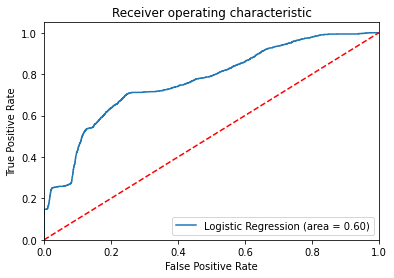

In [55]:
logit_roc_auc = roc_auc_score(y, result2.predict(X))
fpr, tpr, thresholds = roc_curve(y, result2.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()